<h1><center>MACHINE LEARNING FOUNDATION PROJECT 
    (HOUSE PRICE)</center></h1>

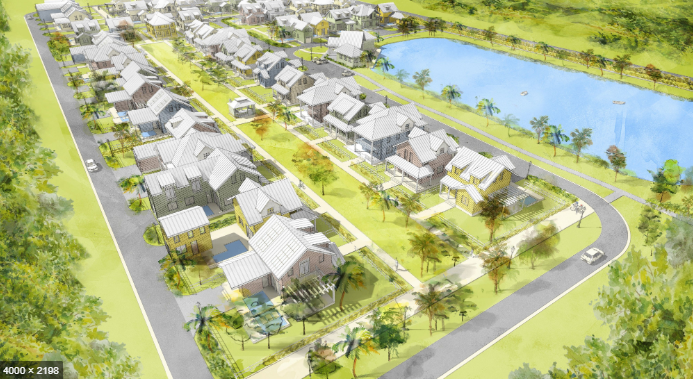

## Table of Contents

1. [Description of the dataset](#section1)<br>
2. [Data Loading and Description](#section2)
3. [Data Profiling](#section3)
    - 3.1 [Dataset Information](#section301)<br/>
    - 3.2 [Pandas Profiling](#section302)<br/>
4. [Analysing the target variable](#section4)
5. [Working on Missing Data](#section5)<br/>
6. [Relationship between features](#section6)<br/>
7. [Modelling](#section7)<br/>
8. [Final training](#section8)<br/>

<a id=section1></a>

## 1. Description of the dataset

The dataset contains the prices of house derived from various factors including location, area in square feet, utilities available (like pool, garage, etc.), year it was built, number of rooms etc.

The aim of this project is to:
- predict the sale prices for houses based on property data
- make a model which can give us a good prediction on the price of the house based on other variables
- to achieve an accuracy score of 85%+

The description of the columns in the dataset can be found in the file 'houseprices.txt' placed in the directory.


<a id=section2></a>

## 2. Importing the packages and dataset

In [1]:
import numpy as np
import pandas as pd
import pandas_profiling
import sklearn
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib.pyplot import pie, axis, show
%matplotlib inline
import seaborn as sns
sns.set()

from subprocess import check_output

In [3]:
train_price = pd.read_csv("C:\\INSAID\\working files\\ML-1 Project\\ML-1 Project\\houseprices.csv")

<a id=section3></a>

## 3. Data Profiling

<a id=section301></a>

### 3.1 Dataset information

We see the shape and head of the data to know how the data looks like.

In [4]:
train_price.shape

(1460, 81)

Read the first 5 rows of data

In [5]:
train_price.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


<a id=section1></a>

Determine the type of data

In [6]:
train_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

- Dataset comprises of 1460 samples and 81 columns.
- Out of 81 columns, 3 are of type float, 35 of type integer and 42 of type object.
- 19 columns have missing data.

Data description - use describe function to see the percentile’s and other key statistics.

In [7]:
train_price.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


- The average sale price is __180921__
- The minimum sale price is __34900__ while the maximum is __755000__

<a id=section302></a>

### 3.2 Pandas Profiling

In [8]:
import pandas_profiling                                                      
profile = pandas_profiling.ProfileReport(train_price)
profile.to_file(outputfile="pandasprofilingfile.html")

__Dataset info__

- Number of variables	81
- Number of observations	1460
- Total Missing (%)	5.9%

__Variables types__

- Numeric	38
- Categorical	43

Check the 'pandasprofilingfile.html' file availble in the directory.

<a id=section4></a>

## 4. Analysing the target variable

Check for normal distibution of target variable SalePrice

Text(0, 0.5, 'Frequency')

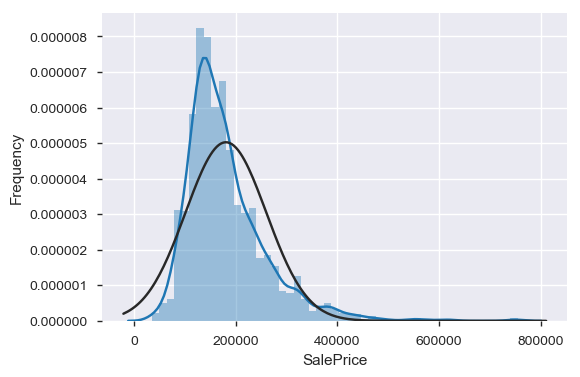

In [9]:
plt.subplots(figsize=(6,4))
sns.distplot(train_price['SalePrice'], fit=stats.norm)
plt.ylabel('Frequency')

View the probability plot

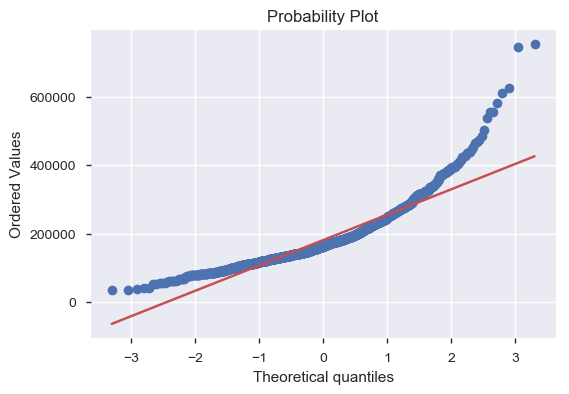

In [10]:
fig = plt.figure(figsize=(6.0,4.0))
stats.probplot(train_price['SalePrice'], plot=plt)
plt.show()

The target variable is not normally distributed and has positive skewness. Since linear models support normally distributed data, we need to transform this variable using the log function and make it normally distributed.

In [11]:
train_price['SalePrice'] = np.log1p(train_price['SalePrice'])

Check for normal distribution and probability plot again

Text(0, 0.5, 'Frequency')

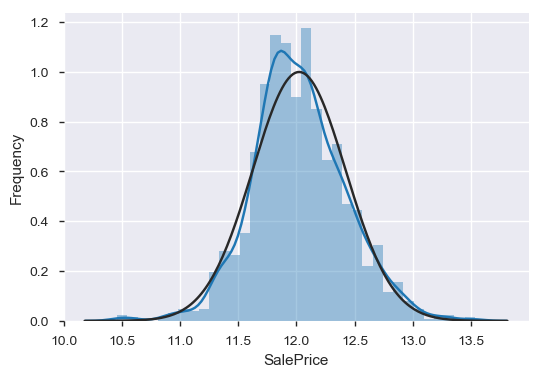

In [12]:
plt.subplots(figsize=(6,4))
sns.distplot(train_price['SalePrice'], fit=stats.norm)
plt.ylabel('Frequency')

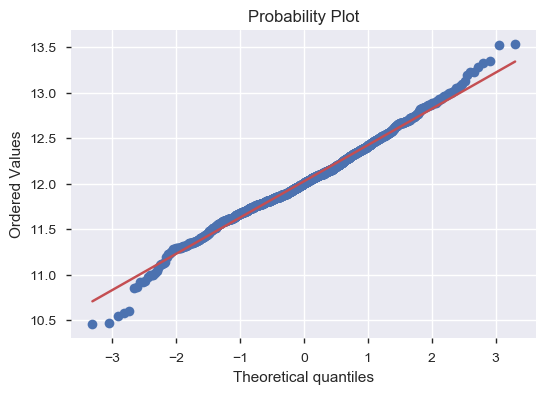

In [13]:
fig = plt.figure(figsize=(6,4))
stats.probplot(train_price['SalePrice'], plot=plt)
plt.show()

The skew has been corrected and the data looks normally distributed.

<a id=section5></a>

## 5. Working on Missing Data

Check for percentage of missing values in the dataset.

In [14]:
Isnull = train_price.isnull().sum()/len(train_price)*100
Isnull = Isnull[Isnull>0]
Isnull.sort_values(inplace=True, ascending=False)
Isnull

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageYrBlt      5.547945
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

Check for percentage of zero values in the dataset

In [15]:
zero_values = train_price[train_price == 0].count(axis=0)/len(train_price)*100
zero_values.sort_values(inplace=True, ascending=False)
zero_values

PoolArea         99.520548
3SsnPorch        98.356164
LowQualFinSF     98.219178
MiscVal          96.438356
BsmtHalfBath     94.383562
ScreenPorch      92.054795
BsmtFinSF2       88.561644
EnclosedPorch    85.753425
HalfBath         62.534247
MasVnrArea       58.972603
BsmtFullBath     58.630137
2ndFlrSF         56.780822
WoodDeckSF       52.123288
Fireplaces       47.260274
OpenPorchSF      44.931507
BsmtFinSF1       31.986301
BsmtUnfSF         8.082192
GarageCars        5.547945
GarageArea        5.547945
TotalBsmtSF       2.534247
FullBath          0.616438
BedroomAbvGr      0.410959
KitchenAbvGr      0.068493
RoofStyle         0.000000
YearRemodAdd      0.000000
YearBuilt         0.000000
OverallCond       0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
                   ...    
HeatingQC         0.000000
Foundation        0.000000
FireplaceQu       0.000000
SaleType          0.000000
YrSold            0.000000
MoSold            0.000000
M

Selecting missing and zero values greater than 80% and then dropping those columns since they do not contribute to SalePrice.

In [16]:
#train_price.drop('3SsnPorch', axis = 1,inplace = True)
train_price.drop('PoolQC', axis = 1,inplace = True)
train_price.drop('MiscFeature', axis = 1,inplace = True)
train_price.drop('Alley', axis = 1,inplace = True)
train_price.drop('Fence', axis = 1,inplace = True)
train_price.drop('PoolArea', axis = 1,inplace = True)
train_price.drop('3SsnPorch', axis = 1,inplace = True)
train_price.drop('LowQualFinSF', axis = 1,inplace = True)
train_price.drop('MiscVal', axis = 1,inplace = True)
train_price.drop('BsmtHalfBath', axis = 1,inplace = True)
train_price.drop('ScreenPorch', axis = 1,inplace = True)
train_price.drop('BsmtFinSF2', axis = 1,inplace = True)
train_price.drop('EnclosedPorch', axis = 1,inplace = True)

<a id=section6></a>

## 6. Relationship between features

Create a correlation matrix to quantify and summarize the relationships between the variables.

In [17]:
train_price_corr = train_price.select_dtypes(include=[np.number])

In [18]:
train_price_corr.shape

(1460, 30)

Delete Id since it is not needed for correlation plot

In [19]:
del train_price_corr['Id']

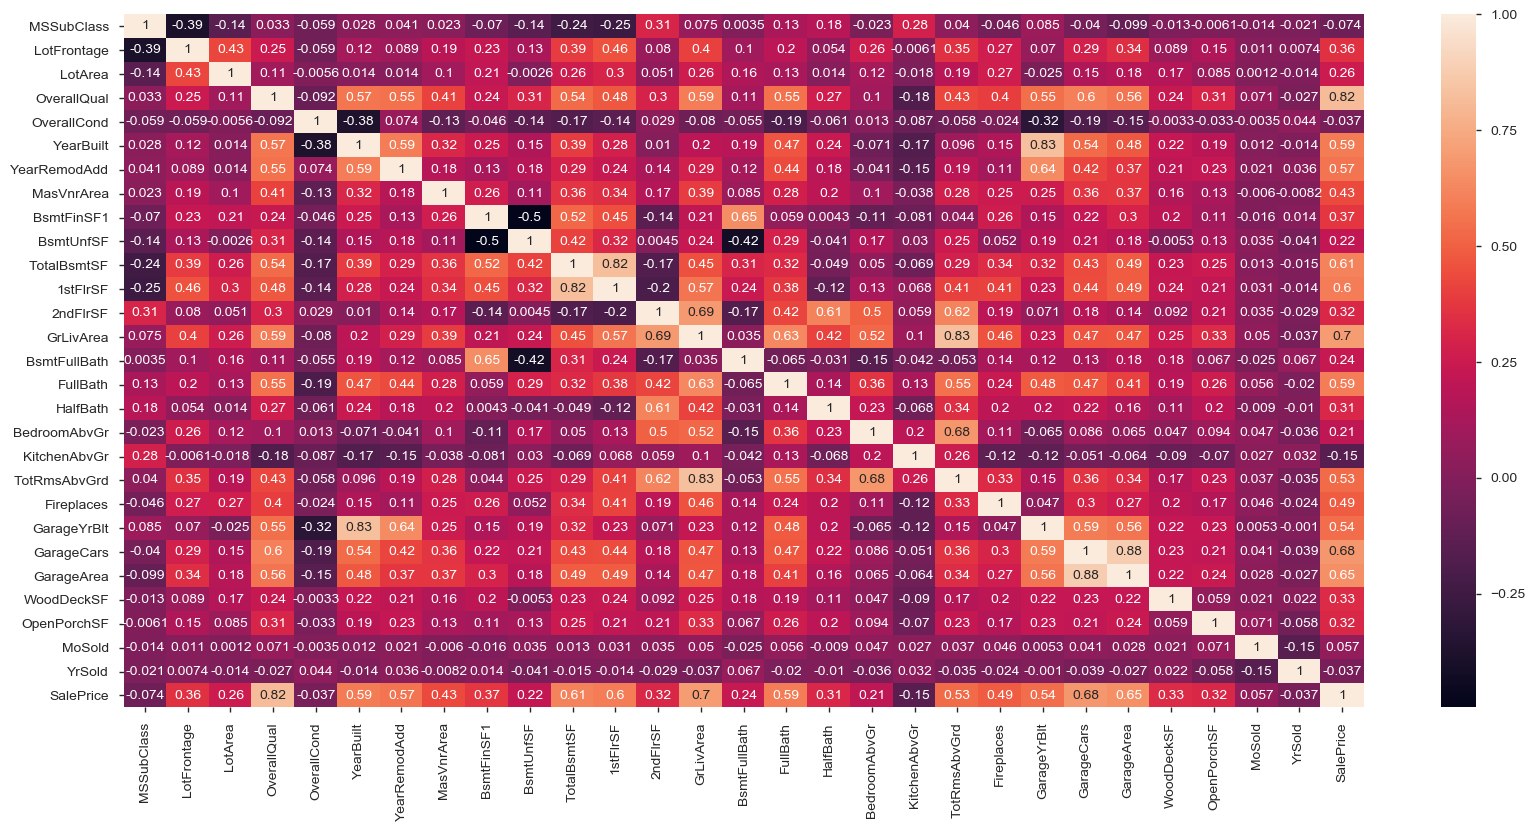

In [20]:
corr = train_price_corr.corr()
plt.subplots(figsize=(20,9))
sns.heatmap(corr, annot=True)

Check the correlation of top features

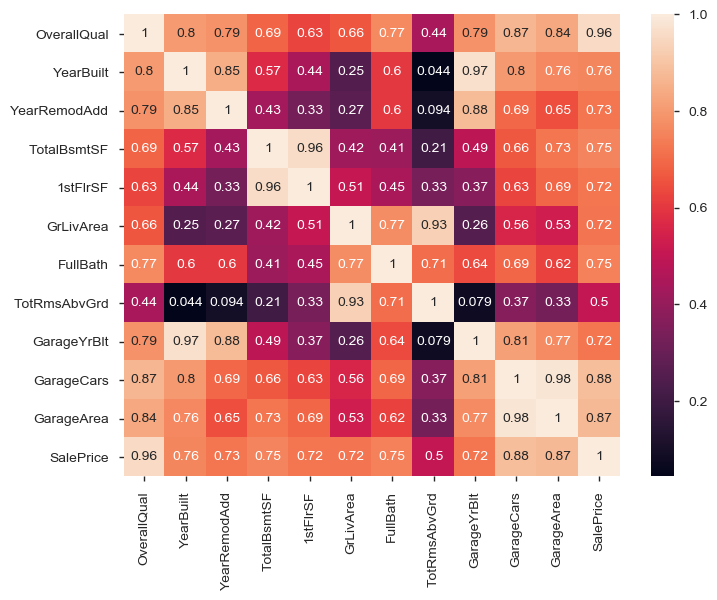

In [21]:
top_feature = corr.index[abs(corr['SalePrice']>0.5)]
plt.subplots(figsize=(8, 6))
top_corr = corr[top_feature].corr()
sns.heatmap(top_corr, annot=True)
plt.show()

<a id=section1></a>

Verify the relationship of the features with SalePrice using a bar plot

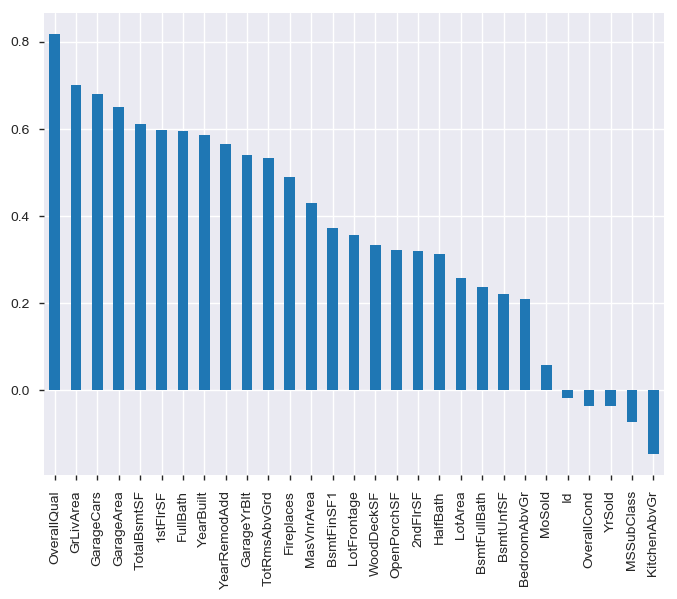

In [22]:
corr_with_sale_price = train_price.corr()["SalePrice"].sort_values(ascending=False)
plt.figure(figsize=(8,6))
corr_with_sale_price.drop("SalePrice").plot.bar()
plt.show();

The correlation of SalePrice with OverallQual is the greatest (around 0.8). Also GrLivArea presents a correlation of over 0.7, and GarageCars presents a correlation of over 0.6.

In [23]:
print("Find most important features relative to target")
corr = train_price.corr()
corr.sort_values(['SalePrice'], ascending=False, inplace=True)
corr.SalePrice

Find most important features relative to target


SalePrice       1.000000
OverallQual     0.817185
GrLivArea       0.700927
GarageCars      0.680625
GarageArea      0.650888
TotalBsmtSF     0.612134
1stFlrSF        0.596981
FullBath        0.594771
YearBuilt       0.586570
YearRemodAdd    0.565608
GarageYrBlt     0.541073
TotRmsAbvGrd    0.534422
Fireplaces      0.489450
MasVnrArea      0.430809
BsmtFinSF1      0.372023
LotFrontage     0.355879
WoodDeckSF      0.334135
OpenPorchSF     0.321053
2ndFlrSF        0.319300
HalfBath        0.313982
LotArea         0.257320
BsmtFullBath    0.236224
BsmtUnfSF       0.221985
BedroomAbvGr    0.209043
MoSold          0.057330
Id             -0.017942
OverallCond    -0.036868
YrSold         -0.037263
MSSubClass     -0.073959
KitchenAbvGr   -0.147548
Name: SalePrice, dtype: float64

Fill missing values with None for:
FireplaceQu, GarageType, GarageFinish, GarageQual, GarageCond, BsmtFinType2, BsmtExposure, BsmtFinType1, BsmtCond, BsmtQual,
MasVnrType

In [24]:
train_price['FireplaceQu'] = train_price['FireplaceQu'].fillna('None')
train_price['GarageType'] = train_price['GarageType'].fillna('None')
train_price['GarageFinish'] = train_price['GarageFinish'].fillna('None')
train_price['GarageQual'] = train_price['GarageQual'].fillna('None')
train_price['GarageCond'] = train_price['GarageCond'].fillna('None')
train_price['BsmtFinType2'] = train_price['BsmtFinType2'].fillna('None')
train_price['BsmtExposure'] = train_price['BsmtExposure'].fillna('None')
train_price['BsmtFinType1'] = train_price['BsmtFinType1'].fillna('None')
train_price['BsmtCond'] = train_price['BsmtCond'].fillna('None')
train_price['BsmtQual'] = train_price['BsmtQual'].fillna('None')
train_price['MasVnrType'] = train_price['MasVnrType'].fillna('None')

Replacing missing values with zero: GarageYrBlt, GarageArea and GarageCars, MasVnrArea

In [25]:
train_price['MasVnrArea'] = train_price['MasVnrArea'].fillna(int(0))
train_price['GarageYrBlt'] = train_price['MasVnrArea'].fillna(int(0))
train_price['GarageArea'] = train_price['MasVnrArea'].fillna(int(0))
train_price['GarageCars'] = train_price['MasVnrArea'].fillna(int(0))

Group by neighborhood and LotFrontage and fill in missing LotFrontage values by its median

In [26]:
train_price['LotFrontage'] = train_price.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

Replacing missing value in Electrical by its mode

In [27]:
train_price['Electrical'] = train_price['Electrical'].fillna(train_price['Electrical']).mode()[0]

Dropping Utilities as it is of no use 

In [28]:
train_price = train_price.drop(['Utilities'], axis=1)

Checking for any null values

In [29]:
Isnull = train_price.isnull().sum()/len(train_price)*100
Isnull = Isnull[Isnull>0]
Isnull.sort_values(inplace=True, ascending=False)
Isnull

Series([], dtype: float64)

There are no Null values

Transform categorical data into numerical data.

In [30]:
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold', 'MSZoning', 'LandContour', 'LotConfig', 'Neighborhood',
        'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
        'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'Foundation', 'GarageType', 
        'SaleType', 'SaleCondition', 'Electrical', 'Heating')

In [31]:
from sklearn.preprocessing import LabelEncoder
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(train_price[c].values)) 
    train_price[c] = lbl.transform(list(train_price[c].values))

Creating train and test set

Assigning target variable SalePrice to Y

In [32]:
Y = train_price['SalePrice']

In [33]:
del train_price['SalePrice']

In [34]:
X = train_price.drop(['Id'], axis=1)

Assigning the X values

In [35]:
X = train_price.values
Y = Y.values

Split data into train and test

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=7)

<a id=section7></a>

## 7. Modelling

We'll use Linear Regression as model validation technique and Root Mean Square Error (RMSE) as evaluation metric.

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [38]:
print("Predict value " + str(lin_model.predict([X_test[142]])))
print("Real value " + str(Y_test[142]))

Predict value [11.70901103]
Real value 11.767187766223199


In [39]:
print("Accuracy --> ", lin_model.score(X_test, Y_test)*100)

Accuracy -->  88.99195805275912


Model evaluation for training and testing set

In [40]:
Y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, Y_train_predict)))

print("The model performance for training set: RMSE is {}".format(rmse))

Y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, Y_test_predict)))

print("The model performance for testing set: RMSE is {}".format(rmse))

The model performance for training set: RMSE is 0.1427447185626545
The model performance for testing set: RMSE is 0.13581709860382193


<a id=section8></a>

## 8. Final training

The lasts steps we have to perform:

- retrain our model using the complete train set
- predict value of SalePrice using the test set
- create the submission file.

### Retrain the model and predict Saleprice

Fitting the entire train data

In [41]:
lin_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Predicting using test set by applying inverse log to the target variable

In [42]:
predictions = np.expm1(lin_model.predict(X_test))
predictions

array([145310.56335049, 201770.77755478, 180314.23422866,  95471.05873523,
       112005.01134296, 297565.1439066 , 147220.82958013, 129449.55233882,
       130794.42763439, 119560.88367589, 207908.87803238, 159383.50551784,
       105901.7921547 , 204884.46335932, 185591.92469296, 175324.34706397,
       224760.97651294, 132183.67428211, 139233.66061849, 158263.15802394,
       190942.59810965, 164393.21194579, 102831.86647008, 230040.55890402,
       333285.86307974, 112356.26260568, 118635.21301013, 183016.91323961,
       223493.22118796, 113551.83999887, 186333.34772026, 193469.38536251,
       274829.32590386, 258085.45462346, 185863.37284561, 265223.52347464,
       123218.67968467, 141250.72230657, 269530.63695389, 199103.02893123,
       120120.40114175, 172156.99279954, 149427.51641872, 117406.1292331 ,
       257939.13115735, 244264.32295057, 195121.26330522, 168434.14596911,
       304439.93801947, 239418.61961124, 247368.79370875, 164437.36005539,
       176966.23235149, 2

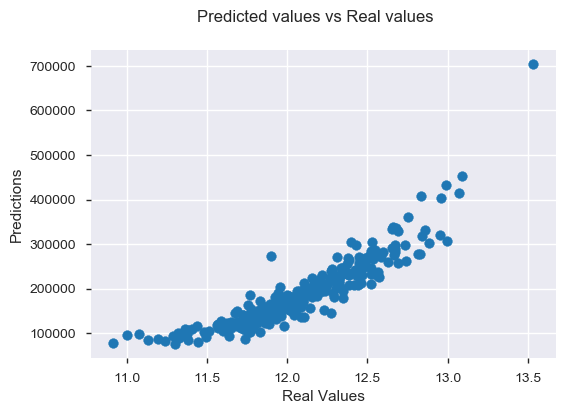

In [43]:
fig = plt.figure(figsize=(6,4))
fig.suptitle('Predicted values vs Real values')
plt.scatter(Y_test, predictions)
plt.xlabel('Real Values')
plt.ylabel('Predictions')

plt.show()

In [44]:
output_csv = pd.DataFrame({'SalePrice':predictions})
output_csv.to_csv('output.csv',index=False)

In [45]:
output_csv['SalePrice'] = predictions
output_csv.head()

,SalePrice
0,145310.563350
1,201770.777555
2,180314.234229
3,95471.058735
4,112005.011343


The 'output.csv' file is available in the directory.